In [1]:
import pandas as pd
import numpy as np
import nsepy
from nsepy import get_history as web
from datetime import date
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from nsepy.derivatives import get_expiry_date

In [46]:
df = web(symbol = 'TATAMOTORS' ,start=date(2022,1,1), end = date(2022,12,31))

In [47]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-01-03,TATAMOTORS,EQ,482.40,493.50,500.85,492.00,496.80,497.60,496.63,32748423,1.626377e+15,353792,7711120,0.2355
2022-01-04,TATAMOTORS,EQ,497.60,496.80,499.00,484.05,489.35,489.60,490.08,24100985,1.181145e+15,257447,5621703,0.2333
2022-01-05,TATAMOTORS,EQ,489.60,486.95,492.75,483.55,487.85,489.75,488.50,15420105,7.532701e+14,166910,4185612,0.2714
2022-01-06,TATAMOTORS,EQ,489.75,481.50,492.95,477.10,488.40,488.85,486.55,16563230,8.058758e+14,177074,2510564,0.1516
2022-01-07,TATAMOTORS,EQ,488.85,490.05,495.50,483.75,489.85,490.60,489.39,15532165,7.601280e+14,161046,3545943,0.2283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,TATAMOTORS,EQ,378.35,380.25,390.70,375.20,385.50,384.80,385.10,16979026,6.538631e+14,243760,5305213,0.3125
2022-12-27,TATAMOTORS,EQ,384.80,390.00,397.45,388.50,395.10,394.15,393.86,14372461,5.660708e+14,189040,2709262,0.1885
2022-12-28,TATAMOTORS,EQ,394.15,394.00,395.90,390.40,390.75,391.30,392.83,8443917,3.317009e+14,153216,2795348,0.3310


In [48]:
df1 = pd.DataFrame(df[['Prev Close', 'Open', 'High','Low','Last', 'Close', 'VWAP','Deliverable Volume']])

In [49]:
df1.reset_index(inplace =True)

In [50]:
df1.drop(['Date'], inplace=True,axis = 1)


In [51]:
df1

,Prev Close,Open,High,Low,Last,Close,VWAP,Deliverable Volume
0,482.40,493.50,500.85,492.00,496.80,497.60,496.63,7711120
1,497.60,496.80,499.00,484.05,489.35,489.60,490.08,5621703
2,489.60,486.95,492.75,483.55,487.85,489.75,488.50,4185612
3,489.75,481.50,492.95,477.10,488.40,488.85,486.55,2510564
4,488.85,490.05,495.50,483.75,489.85,490.60,489.39,3545943
...,...,...,...,...,...,...,...,...
243,378.35,380.25,390.70,375.20,385.50,384.80,385.10,5305213
244,384.80,390.00,397.45,388.50,395.10,394.15,393.86,2709262
245,394.15,394.00,395.90,390.40,390.75,391.30,392.83,2795348
246,391.30,389.00,390.00,383.05,386.50,385.90,385.43,6704995


In [52]:
df2 = pd.DataFrame(df1['Open'])

In [53]:
df2.drop([0], axis = 0, inplace=True)

In [54]:
df2.reset_index(inplace = True)

In [55]:
df2.drop(['index'], axis = 1, inplace = True)

In [56]:
df2.rename(columns = {'Open':'pre'}, inplace=True)

In [57]:
df2

,pre
0,496.80
1,486.95
2,481.50
3,490.05
4,493.10
...,...
242,380.25
243,390.00
244,394.00
245,389.00


In [58]:
dff = pd.concat([df1,df2], axis = 1)

In [59]:
dff.dropna(inplace = True)

In [60]:
dff

,Prev Close,Open,High,Low,Last,Close,VWAP,Deliverable Volume,pre
0,482.40,493.50,500.85,492.00,496.80,497.60,496.63,7711120,496.80
1,497.60,496.80,499.00,484.05,489.35,489.60,490.08,5621703,486.95
2,489.60,486.95,492.75,483.55,487.85,489.75,488.50,4185612,481.50
3,489.75,481.50,492.95,477.10,488.40,488.85,486.55,2510564,490.05
4,488.85,490.05,495.50,483.75,489.85,490.60,489.39,3545943,493.10
...,...,...,...,...,...,...,...,...,...
242,394.45,390.00,390.00,377.00,378.50,378.35,381.94,7817059,380.25
243,378.35,380.25,390.70,375.20,385.50,384.80,385.10,5305213,390.00
244,384.80,390.00,397.45,388.50,395.10,394.15,393.86,2709262,394.00
245,394.15,394.00,395.90,390.40,390.75,391.30,392.83,2795348,389.00


In [ ]:
th = pd.read_csv('thursday_ce_close.csv')
th.set_index('Unnamed: 0',inplace=True)
th.index = pd.to_datetime(th.index)

In [ ]:
fro=pd.read_csv('friday_ce_open.csv')
fro.set_index('Unnamed: 0', inplace = True)
fro.index = pd.to_datetime(fro.index)
fro.index = fro.index - timedelta(days=1)
frpre = fro[['Open(+1000)','Open(+1050)','Open(+1100)','Open(+1150)','Open(+1200)','Open(+1250)','Open(+1300)','Open(+1350)','Open(+1400)','Open(+1450)','High(+1450)']]
frpre.rename(columns = {'Open(+1000)':'fr1000_open','Open(+1050)':'fr1050_open','Open(+1100)':'fr1100_open','Open(+1150)':'fr1150_open','Open(+1200)':'fr1200_open','Open(+1250)':'fr1250_open','Open(+1300)':'fr1300_open','Open(+1350)':'fr1350_open','Open(+1400)':'fr1400_open','Open(+1450)':'fr1450_open','High(+1450)':'Predicted_high1450'}, inplace = True)

In [ ]:
                                  
nf = pd.read_csv('nifty.csv')
nf.set_index('Date',inplace=True)
nf.index = pd.to_datetime(nf.index)

In [ ]:
nfth = nf[nf['day_of_week']=='Thursday']
nfth_close = nfth[['Close']]
nfth_close.rename(columns = {'Close':'Nifty_Thursday_close'},inplace=True)

In [ ]:
nffr= nf[nf['day_of_week']=='Friday']
nffr_open = nffr[['Open']]
nffr_open.rename(columns={'Open':'Nifty_Friday_open'},inplace=True)
nffr_open.index = nffr_open.index - timedelta(days = 1)

In [ ]:
for_fr = pd.concat([th,nfth_close,nffr_open,frpre],axis = 1)
for_fr = for_fr.dropna()

for_fr

In [61]:
X= dff.drop('pre',axis=1)
Y=dff['pre']

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3,random_state=161, shuffle=True)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [64]:
print(lm.intercept_)

16.983748367907197


In [65]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Prev Close,2.296533e-01
Open,-3.536473e-01
High,7.468818e-02
Low,-3.304963e-03
Last,-1.122574e+00
Close,2.026954e+00
VWAP,1.091386e-01
Deliverable Volume,7.885794e-08


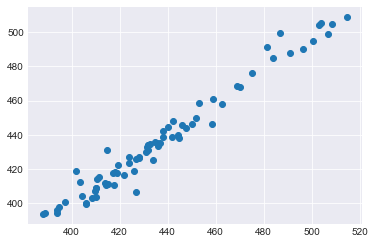

In [66]:
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

In [67]:
df = pd.DataFrame()
df['Actuals'] = y_test
df['Pred'] = predictions
df

,Actuals,Pred
57,436.00,433.361321
216,424.00,427.049053
108,414.90,431.140363
158,459.00,461.142220
182,394.90,397.853349
...,...,...
75,433.90,425.073835
56,432.00,431.162627
41,431.85,433.887338
55,437.00,435.489389


In [68]:
df['MAPE'] = abs((df.Pred - df.Actuals) / df.Actuals) * 100
df['Accuracy'] = 100 - df.MAPE
df

,Actuals,Pred,MAPE,Accuracy
57,436.00,433.361321,0.605202,99.394798
216,424.00,427.049053,0.719116,99.280884
108,414.90,431.140363,3.914284,96.085716
158,459.00,461.142220,0.466715,99.533285
182,394.90,397.853349,0.747873,99.252127
...,...,...,...,...
75,433.90,425.073835,2.034147,97.965853
56,432.00,431.162627,0.193836,99.806164
41,431.85,433.887338,0.471770,99.528230
55,437.00,435.489389,0.345678,99.654322


In [69]:
df.Accuracy.mean()

99.05600857249908

In [70]:
dd = dff[dff['pre'] - dff['Close']>0]

In [71]:

dd

,Prev Close,Open,High,Low,Last,Close,VWAP,Deliverable Volume,pre
3,489.75,481.50,492.95,477.10,488.40,488.85,486.55,2510564,490.05
4,488.85,490.05,495.50,483.75,489.85,490.60,489.39,3545943,493.10
6,503.70,503.00,507.90,498.15,500.80,501.30,503.80,4193201,505.85
9,511.95,509.00,515.40,505.65,509.40,509.90,510.80,3104608,514.80
10,509.90,514.80,526.90,512.00,524.80,525.00,523.11,7210035,527.90
...,...,...,...,...,...,...,...,...,...
239,418.00,418.00,418.00,408.00,409.95,410.50,410.96,4490579,412.60
240,410.50,412.60,414.40,401.00,402.15,402.60,407.27,4232672,404.10
242,394.45,390.00,390.00,377.00,378.50,378.35,381.94,7817059,380.25
243,378.35,380.25,390.70,375.20,385.50,384.80,385.10,5305213,390.00
